In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astroExplain.spectra.explanation import TellMeWhy

In [2]:
# directories for data
bin_id = "bin_03"
user = "/home/edgar"
work_directory = f"{user}/spectra/0_01_z_0_5_4_0_snr_inf"
model = "256_128_64/latent_12/"
metric = "mse_noRel100"
data_directory = (
    f"{work_directory}/{bin_id}/"
    f"explanation/{model}/{metric}"
)

In [3]:
wave = np.load(f"{work_directory}/wave_spectra_imputed.npy")
anomalies = np.load(f"{data_directory}/top_anomalies.npy")
df_anomalies = pd.read_csv(
    f"{data_directory}/top_anomalies.csv.gz",
    index_col="specobjid"
)

median_spectrum = np.load(
    f"{work_directory}/{bin_id}/median_spectrum.npy"
)
average_spectrum = np.load(
    f"{work_directory}/{bin_id}/average_spectrum.npy"
)

Explore average patterns

Text(0.5, 1.0, 'Average spectrum')

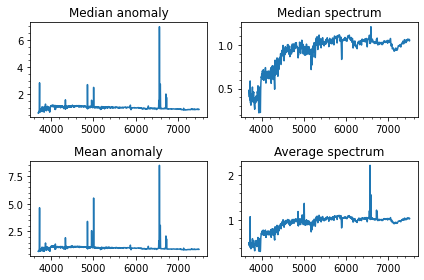

In [4]:
median_anomaly = np.median(anomalies, axis=0)
mean_anomaly = np.mean(anomalies, axis=0)

fig, axs = plt.subplots(2, 2, figsize=None, tight_layout=True)

# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0, 0].plot(wave, median_anomaly)
axs[0, 0].set_title("Median anomaly")

axs[1, 0].plot(wave, mean_anomaly)
axs[1, 0].set_title("Mean anomaly")

axs[0, 1].plot(wave, median_spectrum)
axs[0, 1].set_title("Median spectrum")

axs[1, 1].plot(wave, average_spectrum)
axs[1, 1].set_title("Average spectrum")

Explore explanations

Get heat map of explanation


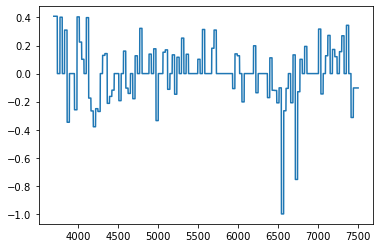

In [5]:
# explanations directory
explanations_directory = f"{data_directory}/000"

# load the explanation with TellMeWhy using pickle

with open(
    f"{explanations_directory}/1002053159448766464.pkl", "rb"
) as file:
    explanation = pickle.load(file)
    why = TellMeWhy(wave=wave, explanation=explanation)

# plot the explanation
tata = why.smooth_and_normalize_explanation()
plt.plot(wave, tata)

In [6]:
# load explnation weights to top 1000 anomalies acording to the metric using their specobjid

weights_top_1000 = np.empty((1000, wave.size))

for i, specobjid in enumerate(df_anomalies.index[-1000:]):

    with open(
        f"{explanations_directory}/{specobjid}.pkl", "rb"
    ) as file:
        explanation = pickle.load(file)
        why = TellMeWhy(wave=wave, explanation=explanation)

        weights_top_1000[i, :] = why.smooth_and_normalize_explanation()

Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of expl

Summary stats of explanation weights

Text(0.5, 1.0, 'Median weights')

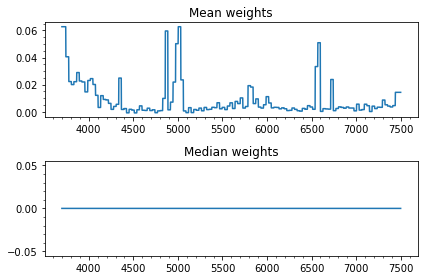

In [7]:
# mean and median of the weights of the top 1000 anomalies along the wave axis
mean_weigh = np.mean(weights_top_1000, axis=0)
median_weigh = np.median(weights_top_1000, axis=0)

# plot the mean and median of the weights of the top 1000 anomalies along the wave axis
fig, axs = plt.subplots(2, 1, figsize=None, tight_layout=True)

# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0].plot(wave, mean_weigh)
axs[0].set_title("Mean weights")

axs[1].plot(wave, median_weigh)
axs[1].set_title("Median weights")


Text(0.5, 1.0, 'Median weights')

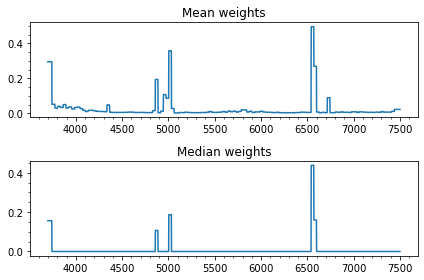

In [8]:
# repeat previous steps for the absolute values of the weights

mean_weigh_abs = np.mean(np.abs(weights_top_1000), axis=0)
median_weigh_abs = np.median(np.abs(weights_top_1000), axis=0)

fig, axs = plt.subplots(2, 1, figsize=None, tight_layout=True)

# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0].plot(wave, mean_weigh_abs)
axs[0].set_title("Mean weights")

axs[1].plot(wave, median_weigh_abs)
axs[1].set_title("Median weights")


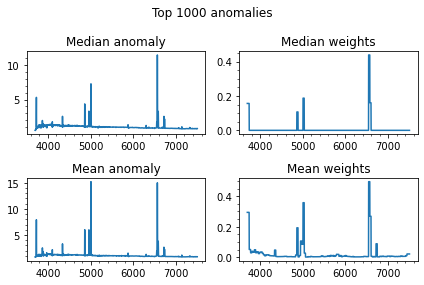

In [10]:
# compute median and mean spectra of the top 1000 anomalies
median_spectrum_top_1000 = np.median(anomalies[-1000:], axis=0)
mean_spectrum_top_1000 = np.mean(anomalies[-1000:], axis=0)

# plot the median and mean spectra of the top 1000 anomalies with the median and mean weights

fig, axs = plt.subplots(2, 2, figsize=None, tight_layout=True)

# add title to the figure

fig.suptitle("Top 1000 anomalies")

# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0, 0].plot(wave, median_spectrum_top_1000)
axs[0, 0].set_title("Median anomaly")

axs[1, 0].plot(wave, mean_spectrum_top_1000)
axs[1, 0].set_title("Mean anomaly")

axs[0, 1].plot(wave, median_weigh_abs)
axs[0, 1].set_title("Median weights")

axs[1, 1].plot(wave, mean_weigh_abs)
axs[1, 1].set_title("Mean weights")

fig.savefig(f"/home/edgar/Downloads/sumary_of_weights_and_anomalies_top_1000.pdf")

Repeat same steps but for all the anomalies

In [11]:
weights_top = np.empty(anomalies.shape)

for i, specobjid in enumerate(df_anomalies.index):

    with open(
        f"{explanations_directory}/{specobjid}.pkl", "rb"
    ) as file:
        explanation = pickle.load(file)
        why = TellMeWhy(wave=wave, explanation=explanation)

        weights_top[i, :] = why.smooth_and_normalize_explanation()

Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of expl

In [12]:
# mean and median spectrum of all anomalies

mean_spectrum_top = np.mean(anomalies, axis=0)
median_spectrum_top = np.median(anomalies, axis=0)

# mean and median of the abs weights of all anomalies along the wave axis

mean_weigh_abs_top = np.mean(np.abs(weights_top), axis=0)
median_weigh_abs_top = np.median(np.abs(weights_top), axis=0)



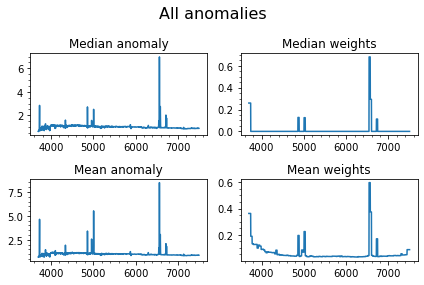

In [13]:
# plot the median and mean spectra all anomalies with the median and mean weights

fig, axs = plt.subplots(2, 2, figsize=None, tight_layout=True)

#add title to the figure
fig.suptitle("All anomalies", fontsize=16)

# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0, 0].plot(wave, median_spectrum_top)
axs[0, 0].set_title("Median anomaly")

axs[1, 0].plot(wave, mean_spectrum_top)
axs[1, 0].set_title("Mean anomaly")

axs[0, 1].plot(wave, median_weigh_abs_top)
axs[0, 1].set_title("Median weights")

axs[1, 1].plot(wave, mean_weigh_abs_top)
axs[1, 1].set_title("Mean weights")

fig.savefig(f"/home/edgar/Downloads/sumary_of_weights_and_anomalies_all.pdf")